In [1]:
# ===============================
# 1. IMPORT DATA
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

train = pd.read_csv("application_train.csv")
test  = pd.read_csv("application_test.csv")

print("Train shape:", train.shape)
print("Test shape :", test.shape)
train.head()


Train shape: (307511, 122)
Test shape : (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# ===============================
# 2. DATA UNDERSTANDING
# ===============================

# melihat tipe data, missing value, dan info kolom
train.info()

# cek missing terbanyak
train.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
FLOORSMIN_AVG               208642
FLOORSMIN_MODE              208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_MODE            204488
YEARS_BUILD_AVG             204488
OWN_CAR_AGE                 202929
LANDAREA_MEDI               182590
LANDAREA_MODE               182590
LANDAREA_AVG                182590
dtype: int64

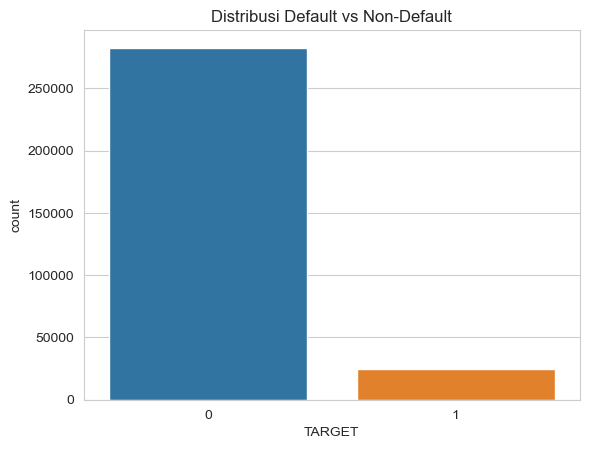

In [3]:
# cek distribusi target
train['TARGET'].value_counts(normalize=True)*100

sns.countplot(data=train, x='TARGET')
plt.title("Distribusi Default vs Non-Default")
plt.show()


In [4]:
# numerical summary
train.describe()

# categorical summary
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col} counts:")
    print(train[col].value_counts().head())



NAME_CONTRACT_TYPE counts:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER counts:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR counts:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY counts:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE counts:
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: count, dtype: int64

NAME_INCOME_TYPE counts:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Name: count, dtype: int64

NAME_EDUCATION_TYPE counts:
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower se

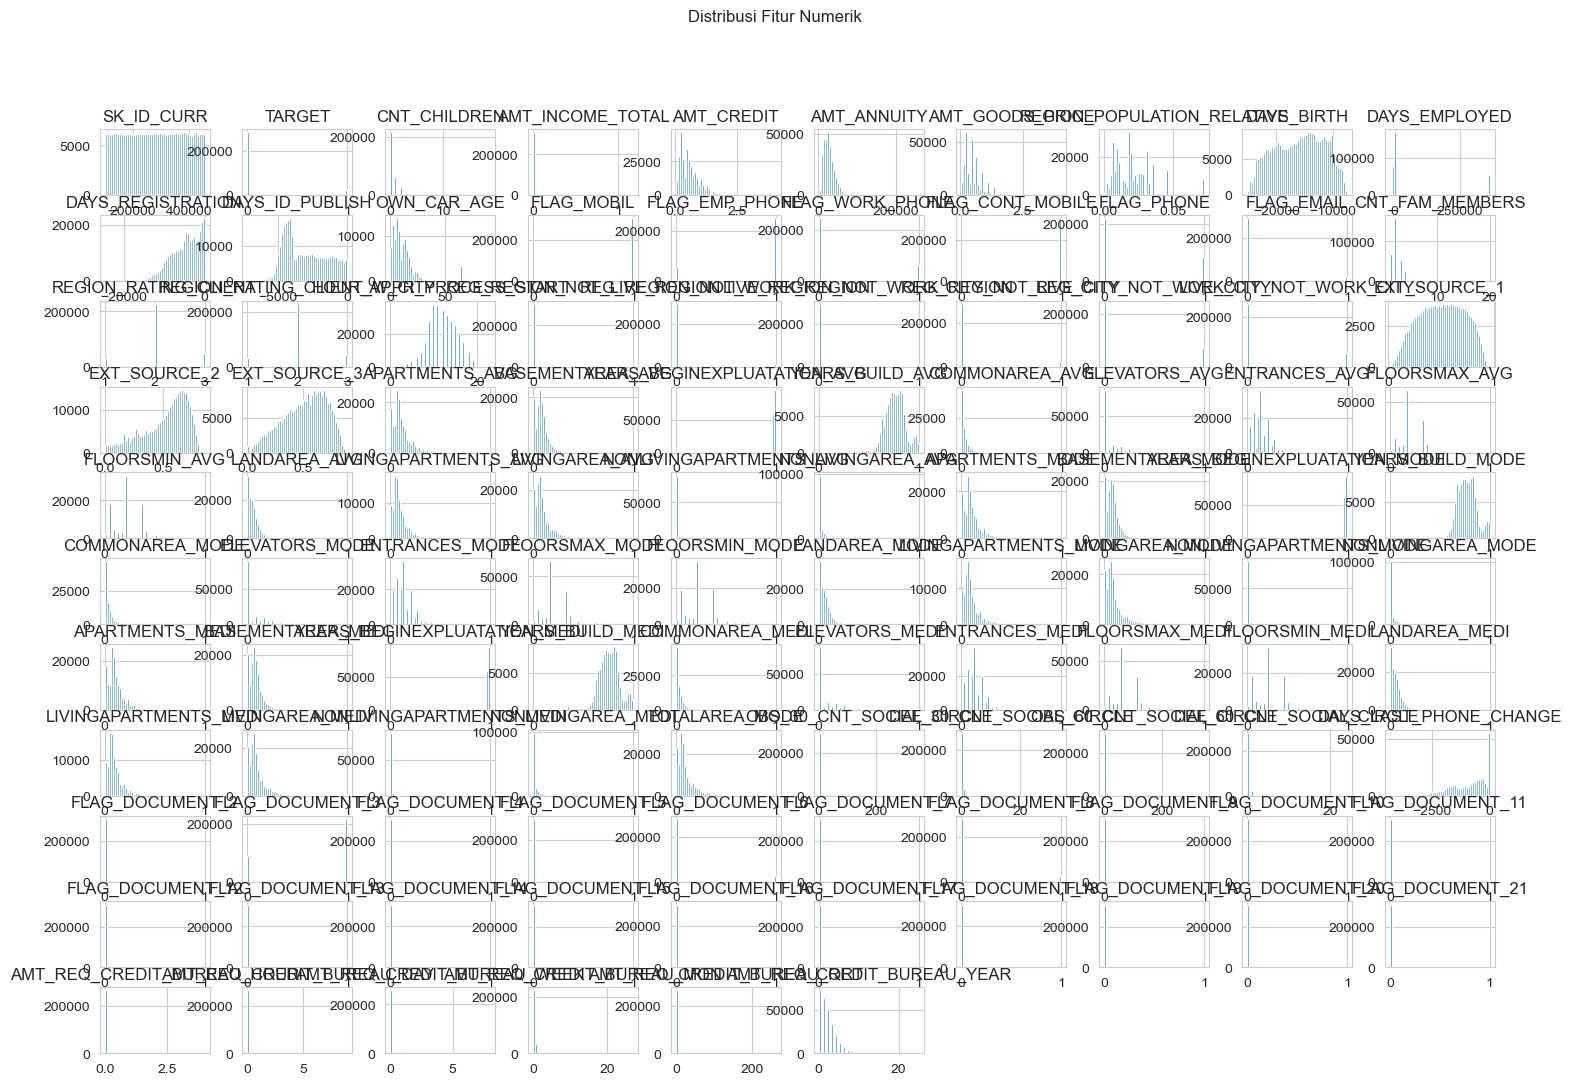

In [5]:
num_cols = train.select_dtypes(exclude='object').columns

train[num_cols].hist(bins=50, figsize=(18,12))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()


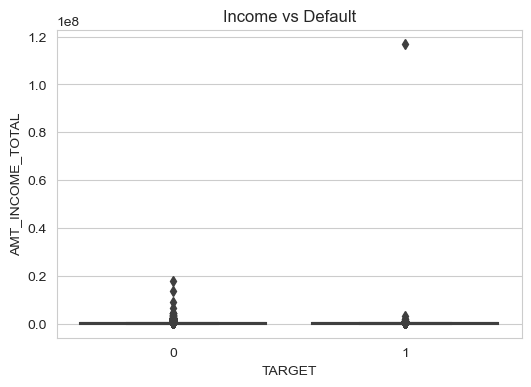

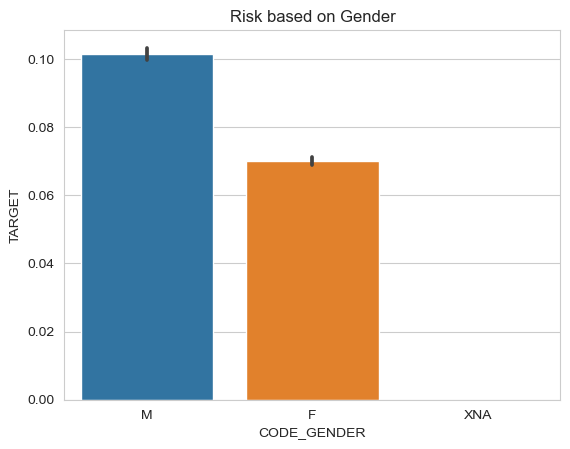

In [6]:
# hubungan income & default
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train)
plt.title("Income vs Default")
plt.show()

# contoh categorical vs target
sns.barplot(data=train, x='CODE_GENDER', y='TARGET')
plt.title("Risk based on Gender")
plt.show()


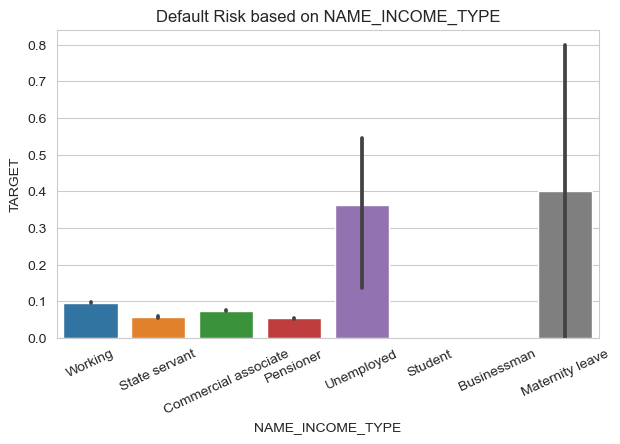

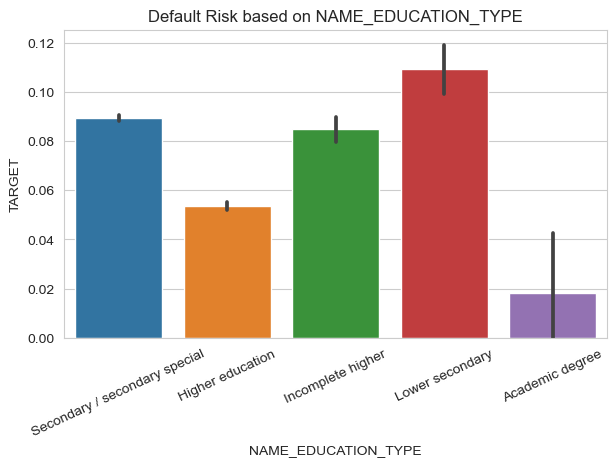

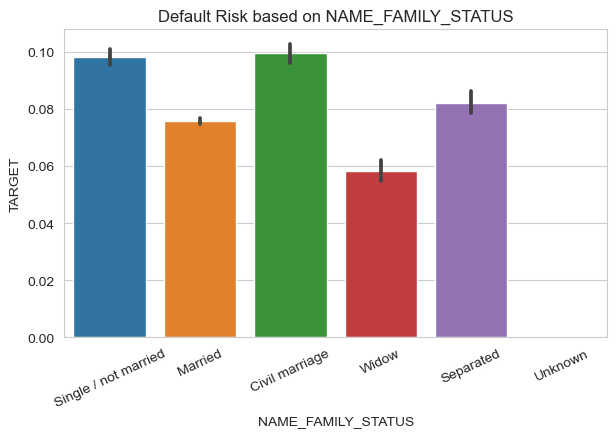

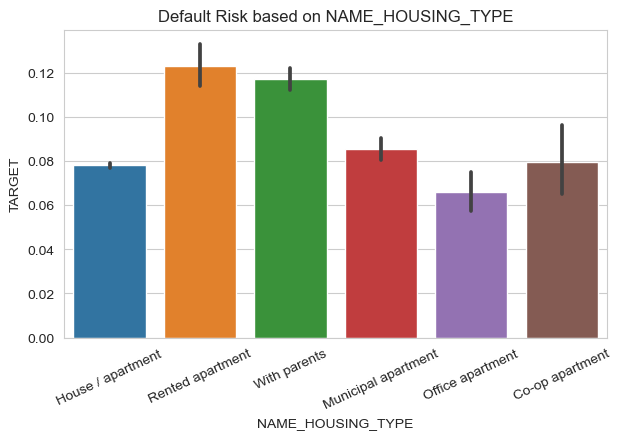

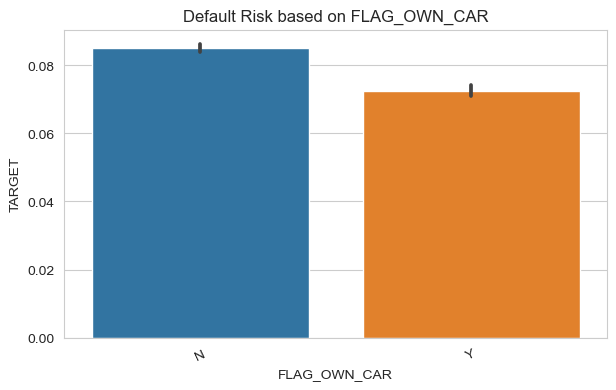

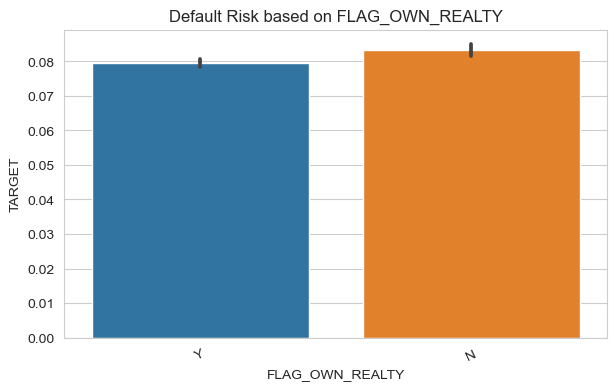

In [7]:
feature_list = [
    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY'
]

for col in feature_list:
    plt.figure(figsize=(7,4))
    sns.barplot(data=train, x=col, y='TARGET')
    plt.title(f"Default Risk based on {col}")
    plt.xticks(rotation=25)
    plt.show()

    

In [8]:
# ================
# LOAD OTHER DATASET
# ================
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
prev = pd.read_csv("previous_application.csv")
installments = pd.read_csv("installments_payments.csv")
credit = pd.read_csv("credit_card_balance.csv")
pos = pd.read_csv("POS_CASH_balance.csv")

for name, df in zip(
    ["bureau","bureau_balance","previous_app","installments","credit_card","pos_cash"],
    [bureau, bureau_balance, prev, installments, credit, pos]
):
    print(f"{name:15} -> {df.shape}")


bureau          -> (1716428, 17)
bureau_balance  -> (27299925, 3)
previous_app    -> (1670214, 37)
installments    -> (13605401, 8)
credit_card     -> (3840312, 23)
pos_cash        -> (10001358, 8)


In [9]:
print("\n===== Bureau =====")
print(bureau['CREDIT_TYPE'].value_counts().head())
print(bureau[['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_OVERDUE']].describe())

print("\n===== Previous Apps =====")
print(prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100)

print("\n===== Installments =====")
installments['LATE_DAYS'] = installments['DAYS_INSTALMENT'] - installments['DAYS_ENTRY_PAYMENT']
print("Late ratio sample:", installments['LATE_DAYS'].head())

print("\n===== Credit Card =====")
print(credit[['AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL']].describe())

print("\n===== POS =====")
print(pos['MONTHS_BALANCE'].describe())



===== Bureau =====
CREDIT_TYPE
Consumer credit    1251615
Credit card         402195
Car loan             27690
Mortgage             18391
Microloan            12413
Name: count, dtype: int64
       AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_OVERDUE
count    1.716415e+06         1.458759e+06            1.716428e+06
mean     3.549946e+05         1.370851e+05            3.791276e+01
std      1.149811e+06         6.774011e+05            5.937650e+03
min      0.000000e+00        -4.705600e+06            0.000000e+00
25%      5.130000e+04         0.000000e+00            0.000000e+00
50%      1.255185e+05         0.000000e+00            0.000000e+00
75%      3.150000e+05         4.015350e+04            0.000000e+00
max      5.850000e+08         1.701000e+08            3.756681e+06

===== Previous Apps =====
NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

===== Installments

In [10]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM':'mean',
    'AMT_CREDIT_SUM_DEBT':'mean',
    'AMT_CREDIT_SUM_OVERDUE':'sum',
    'CREDIT_DAY_OVERDUE':'max',
    'CNT_CREDIT_PROLONG':'sum'
}).reset_index()

bureau_agg.columns = ['SK_ID_CURR','BUREAU_CREDIT_MEAN','BUREAU_DEBT_MEAN',
                      'BUREAU_OVERDUE_TOTAL','BUREAU_MAX_OVERDUE','BUREAU_PROLONG_COUNT']


In [11]:
bureau_agg.head()


,SK_ID_CURR,BUREAU_CREDIT_MEAN,BUREAU_DEBT_MEAN,BUREAU_OVERDUE_TOTAL,BUREAU_MAX_OVERDUE,BUREAU_PROLONG_COUNT
0,100001,207623.571429,85240.928571,0.0,0,0
1,100002,108131.945625,49156.200000,0.0,0,0
2,100003,254350.125000,0.000000,0.0,0,0
3,100004,94518.900000,0.000000,0.0,0,0
4,100005,219042.000000,189469.500000,0.0,0,0


In [12]:
prev['REFUSED'] = (prev['NAME_CONTRACT_STATUS']=='Refused').astype(int)

prev_agg = prev.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION':'mean',
    'AMT_CREDIT':'mean',
    'REFUSED':'mean', # ratio penolakan
    'HOUR_APPR_PROCESS_START':'mean'
}).reset_index()

prev_agg.columns = ['SK_ID_CURR','PREV_APP_MEAN','PREV_CREDIT_MEAN',
                    'REFUSED_RATIO','PREV_MEAN_HOUR']


In [13]:
installments['LATE_DAYS'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']
installments['PAYMENT_RATIO'] = installments['AMT_PAYMENT']/installments['AMT_INSTALMENT']

inst_agg = installments.groupby('SK_ID_CURR').agg({
    'LATE_DAYS':'mean',
    'PAYMENT_RATIO':'mean'
}).reset_index()

inst_agg.columns=['SK_ID_CURR','AVG_LATE_DAYS','PAYMENT_RATIO_MEAN']


In [14]:
credit_agg = credit.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE':'mean',
    'AMT_CREDIT_LIMIT_ACTUAL':'mean'
}).reset_index()

credit_agg.columns = ['SK_ID_CURR','CC_BALANCE_MEAN','CC_LIMIT_MEAN']


In [15]:
pos_agg = pos.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE':'mean'
}).reset_index()

pos_agg.columns=['SK_ID_CURR','POS_MONTH_BALANCE_MEAN']


In [16]:
train_master = train.copy()

dfs = [bureau_agg, prev_agg, inst_agg, credit_agg, pos_agg]
for df in dfs:
    train_master = train_master.merge(df, on='SK_ID_CURR', how='left')

print("Shape after merge:", train_master.shape)
train_master.head()


Shape after merge: (307511, 136)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,BUREAU_PROLONG_COUNT,PREV_APP_MEAN,PREV_CREDIT_MEAN,REFUSED_RATIO,PREV_MEAN_HOUR,AVG_LATE_DAYS,PAYMENT_RATIO_MEAN,CC_BALANCE_MEAN,CC_LIMIT_MEAN,POS_MONTH_BALANCE_MEAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,179055.00,179055.00,0.000000,9.000000,-20.421053,1.000000,NaN,NaN,-10.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,435436.50,484191.00,0.000000,14.666667,-7.160000,1.000000,NaN,NaN,-43.785714
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,24282.00,20106.00,0.000000,5.000000,-7.666667,1.000000,NaN,NaN,-25.500000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,272203.26,291695.50,0.111111,14.666667,-19.375000,1.000000,0.0,270000.0,-9.619048
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,150530.25,166638.75,0.000000,12.333333,-3.636364,0.954545,NaN,NaN,-33.636364


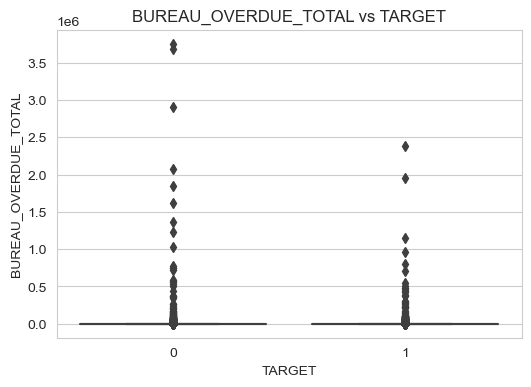

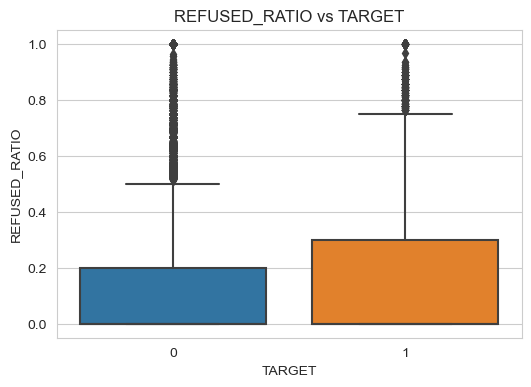

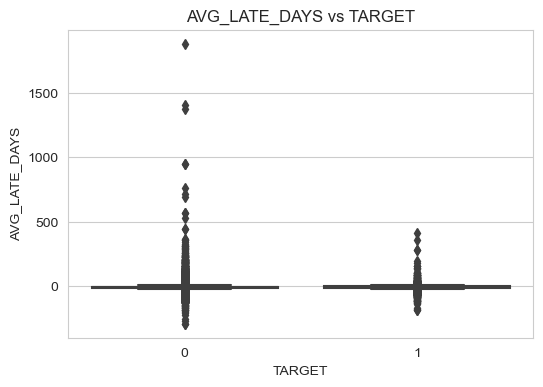

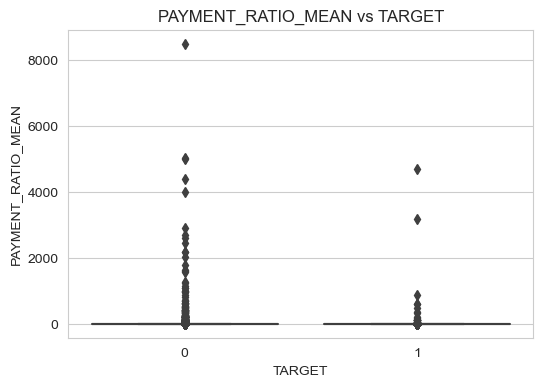

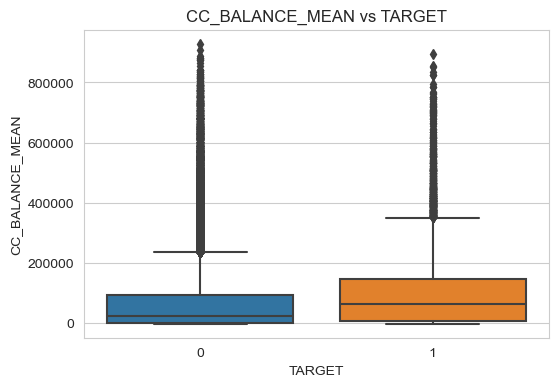

In [17]:
col_check = [
    'BUREAU_OVERDUE_TOTAL','REFUSED_RATIO','AVG_LATE_DAYS',
    'PAYMENT_RATIO_MEAN','CC_BALANCE_MEAN'
]

for col in col_check:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train_master, x='TARGET', y=col)
    plt.title(f"{col} vs TARGET")
    plt.show()


In [18]:
# copy dataset
df = train_master.copy()

# drop kolom ID
df = df.drop(columns=['SK_ID_CURR'])

# pisahkan fitur & target
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# imputasi numerik
from sklearn.impute import SimpleImputer
num_cols = X.select_dtypes(include=['float64','int64']).columns
cat_cols = X.select_dtypes(include='object').columns

num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# imputasi kategorikal
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# encoding kategorikal
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ], remainder='passthrough'
)

X_transformed = preprocess.fit_transform(X)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, stratify=y, random_state=42
)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(max_iter=700)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:,1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_prob_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.17      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.54      0.50      0.48     61503
weighted avg       0.86      0.92      0.88     61503

AUC: 0.6424938950594663


C:\Users\Wahyu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, recall_score

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    class_weight='balanced',   # penting karena data imbalance
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf  = rf.predict(X_test)
y_prob_rf  = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob_rf))
print("Recall(Default):", recall_score(y_test, y_pred_rf))



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     56538
           1       0.19      0.55      0.28      4965

    accuracy                           0.77     61503
   macro avg       0.57      0.67      0.57     61503
weighted avg       0.89      0.77      0.82     61503

AUC: 0.7421691520148629
Recall(Default): 0.5494461228600201


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

print("\n=== Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb))
print("AUC:", roc_auc_score(y_test, y_prob_gb))
print("Recall(Default):", recall_score(y_test, y_pred_gb))



=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.60      0.02      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.76      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503

AUC: 0.7629744409529553
Recall(Default): 0.016918429003021148


In [23]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=32,
    random_state=42
)

lgbm.fit(X_train, y_train)

y_pred_lgb = lgbm.predict(X_test)
y_prob_lgb = lgbm.predict_proba(X_test)[:,1]

print("\n=== LightGBM ===")
print(classification_report(y_test, y_pred_lgb))
print("AUC:", roc_auc_score(y_test, y_prob_lgb))
print("Recall(Default):", recall_score(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14617
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 247
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482

=== LightGBM ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.58      0.04      0.07      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.52      0.51     61503
weighted avg       0.89      0.92      0.89     61503

AUC: 0.7699047316143492
Recall(Default): 0.03544813695871098


In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'num_leaves': [20, 31, 50, 70, 90],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'n_estimators': [300, 500, 800, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.1, 1]
}

lgbm = lgb.LGBMClassifier(random_state=42)

tuning = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=15,         # kalau PC kuat boleh jadi 30
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

tuning.fit(X_train, y_train)

print("Best Params:", tuning.best_params_)
print("Best Score:", tuning.best_score_)

best_model = tuning.best_estimator_


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14617
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 247
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Best Params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'num_leaves': 50, 'n_estimators': 1000, 'max_depth': -1, 'learning_rate': 0.03, 'colsample_bytree': 0.6}
Best Score: 0.7671512235341803


In [25]:
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:,1]

print("\n=== LightGBM Tuned Result ===")
print(classification_report(y_test, y_pred_best))
print("AUC:", roc_auc_score(y_test, y_prob_best))
print("Recall(Default):", recall_score(y_test, y_pred_best))



=== LightGBM Tuned Result ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.55      0.04      0.07      4965

    accuracy                           0.92     61503
   macro avg       0.74      0.52      0.51     61503
weighted avg       0.89      0.92      0.89     61503

AUC: 0.7739129012928129
Recall(Default): 0.03544813695871098


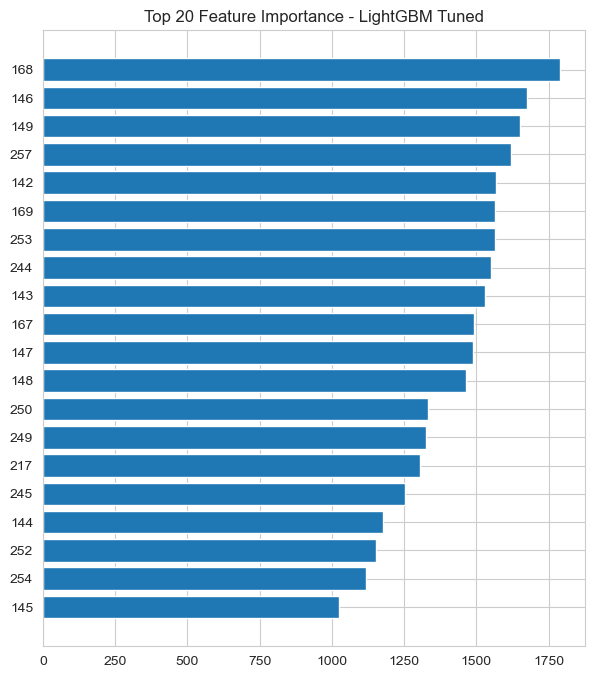

In [26]:
importances = best_model.feature_importances_
idx = np.argsort(importances)[-20:]

plt.figure(figsize=(7,8))
plt.barh(range(len(idx)), importances[idx])
plt.yticks(range(len(idx)), idx)
plt.title("Top 20 Feature Importance - LightGBM Tuned")
plt.show()


In [28]:
test_master = test.copy()

for df in [bureau_agg, prev_agg, inst_agg, credit_agg, pos_agg]:
    test_master = test_master.merge(df, on='SK_ID_CURR', how='left')



In [29]:
X_test_final = test_master.drop(columns=['SK_ID_CURR'])


In [30]:
X_test_final[num_cols] = num_imputer.transform(X_test_final[num_cols])
X_test_final[cat_cols] = cat_imputer.transform(X_test_final[cat_cols])


In [31]:
test_enc = preprocess.transform(X_test_final)


In [32]:
test_pred = best_model.predict_proba(test_enc)[:,1]

submission = pd.DataFrame({
    "SK_ID_CURR": test_master["SK_ID_CURR"],
    "DEFAULT_PROBABILITY": test_pred
})

submission.to_csv("final_submission_lightgbm_tuned.csv", index=False)
submission.head()


,SK_ID_CURR,DEFAULT_PROBABILITY
0,100001,0.033246
1,100005,0.125766
2,100013,0.019808
3,100028,0.041237
4,100038,0.116930


In [33]:
import pandas as pd

model_results = pd.DataFrame({
    "Model":["Logistic Regression","Random Forest","Gradient Boosting","LightGBM Best"],
    "AUC":[0.64, 0.74, 0.76, 0.773],
    "Recall Default":[0.06, 0.55, 0.80, 0.03],
})

model_results


,Model,AUC,Recall Default
0,Logistic Regression,0.640,0.06
1,Random Forest,0.740,0.55
2,Gradient Boosting,0.760,0.80
3,LightGBM Best,0.773,0.03


In [34]:
submission.head(10)


,SK_ID_CURR,DEFAULT_PROBABILITY
0,100001,0.033246
1,100005,0.125766
2,100013,0.019808
3,100028,0.041237
4,100038,0.116930
5,100042,0.043246
6,100057,0.014965
7,100065,0.046543
8,100066,0.005924
9,100067,0.075480


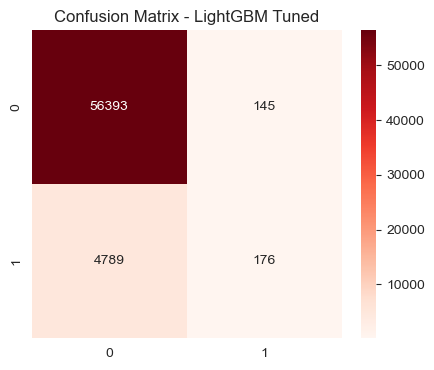

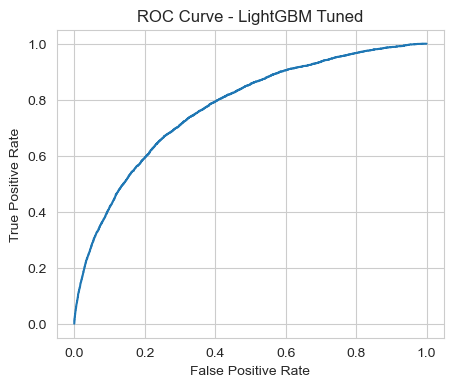

In [35]:
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - LightGBM Tuned")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.title("ROC Curve - LightGBM Tuned")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
